In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
healthy = sc.read_h5ad("GSE174188/GSE174188_Healthy.h5ad")
healthy

AnnData object with n_obs × n_vars = 486418 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
cell_type = list(set(healthy.obs.cell_type))
cell_type

['PB', 'B', 'Monocyte', 'CD4 T', 'Progen', 'CD8 T', 'NK', 'Prolif', 'DC']

# remove < 0.5%

In [4]:
sample = list(set(healthy.obs.ind_cov))

rows_to_remove = []
for i in sample:
    healthy = healthy[healthy.obs.Status == "Healthy", :]
    if healthy[healthy.obs.ind_cov == i,:].n_obs < healthy.n_obs*0.005:
        rows_to_remove.append(i)
    healthy_filter = healthy[~healthy.obs.ind_cov.isin(rows_to_remove),:]    
    
healthy_filter

View of AnnData object with n_obs × n_vars = 474740 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# separate each person

In [5]:
sample = list(set(healthy_filter.obs.ind_cov))

personal = {}
for i in sample:
    if i not in personal:
        personal[i] = healthy[healthy.obs.ind_cov == i, :]
# 將personal進行排序
sorted_personal = dict(sorted(personal.items(), key=lambda x: x[1].obs.Age[0]))

In [6]:
with open("pearson_negative_celltype_genes_top200_remove 0.5%_ENSG.csv", 'r') as file:
    negative_top200 = pd.read_csv(file, index_col = 0)
with open("pearson_positive_celltype_genes_top200_remove 0.5%_ENSG.csv", 'r') as file:
    positive_top200 = pd.read_csv(file, index_col = 0)
negative_top200

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Prolif,ENSG00000169435,ENSG00000173821,ENSG00000125148,ENSG00000160613,ENSG00000113448,ENSG00000172794,ENSG00000187837,ENSG00000121895,ENSG00000010810,ENSG00000034677,...,ENSG00000054793,ENSG00000135842,ENSG00000163599,ENSG00000150527,ENSG00000077984,ENSG00000110651,ENSG00000168813,ENSG00000172867,ENSG00000153898,ENSG00000049247
NK,ENSG00000164825,ENSG00000198851,ENSG00000115523,ENSG00000231500,ENSG00000197971,ENSG00000140030,ENSG00000143184,ENSG00000142089,ENSG00000109321,ENSG00000185338,...,ENSG00000153071,ENSG00000158417,ENSG00000100100,ENSG00000005379,ENSG00000185864,ENSG00000065883,ENSG00000154310,ENSG00000198756,ENSG00000148362,ENSG00000064886
CD8 T,ENSG00000100097,ENSG00000122026,ENSG00000100100,ENSG00000168685,ENSG00000231500,ENSG00000126353,ENSG00000154814,ENSG00000074966,ENSG00000256039,ENSG00000237943,...,ENSG00000069188,ENSG00000249709,ENSG00000182463,ENSG00000267458,ENSG00000237499,ENSG00000007350,ENSG00000161267,ENSG00000272369,ENSG00000273448,ENSG00000268362
Progen,ENSG00000162747,ENSG00000110092,ENSG00000259747,ENSG00000240403,ENSG00000137259,ENSG00000213934,ENSG00000161610,ENSG00000243772,ENSG00000237343,ENSG00000205595,...,ENSG00000137642,ENSG00000170921,ENSG00000173926,ENSG00000100300,ENSG00000092853,ENSG00000240303,ENSG00000188112,ENSG00000179094,ENSG00000168497,ENSG00000139971
CD4 T,ENSG00000198502,ENSG00000122026,ENSG00000251562,ENSG00000126353,ENSG00000100100,ENSG00000168685,ENSG00000134954,ENSG00000124766,ENSG00000166669,ENSG00000070081,...,ENSG00000263874,ENSG00000126870,ENSG00000091879,ENSG00000102804,ENSG00000230148,ENSG00000234663,ENSG00000145088,ENSG00000157168,ENSG00000160229,ENSG00000165929
DC,ENSG00000272211,ENSG00000198502,ENSG00000008517,ENSG00000109321,ENSG00000237541,ENSG00000100453,ENSG00000188825,ENSG00000235162,ENSG00000132965,ENSG00000169583,...,ENSG00000135976,ENSG00000111863,ENSG00000104660,ENSG00000234572,ENSG00000113088,ENSG00000180871,ENSG00000227468,ENSG00000146433,ENSG00000187837,ENSG00000173064
B,ENSG00000110092,ENSG00000198502,ENSG00000023445,ENSG00000247982,ENSG00000237541,ENSG00000100100,ENSG00000077238,ENSG00000008517,ENSG00000196781,ENSG00000171681,...,ENSG00000185198,ENSG00000196937,ENSG00000107362,ENSG00000112486,ENSG00000188994,ENSG00000223547,ENSG00000225746,ENSG00000110042,ENSG00000163697,ENSG00000268220
Monocyte,ENSG00000134954,ENSG00000110848,ENSG00000198502,ENSG00000120738,ENSG00000155307,ENSG00000188825,ENSG00000118515,ENSG00000204103,ENSG00000008517,ENSG00000169508,...,ENSG00000138435,ENSG00000109906,ENSG00000251323,ENSG00000119632,ENSG00000163739,ENSG00000116661,ENSG00000183508,ENSG00000169583,ENSG00000135218,ENSG00000143851
PB,ENSG00000225135,ENSG00000128656,ENSG00000205595,ENSG00000224020,ENSG00000237253,ENSG00000197632,ENSG00000243772,ENSG00000215764,ENSG00000110092,ENSG00000121895,...,ENSG00000185928,ENSG00000079931,ENSG00000155307,ENSG00000172031,ENSG00000230587,ENSG00000007350,ENSG00000100721,ENSG00000067369,ENSG00000175463,ENSG00000135116


In [7]:
# only select top 20 gene
negative_top20 = negative_top200.drop(columns = negative_top200.columns[20:], axis = 1)

positive_top20 = positive_top200.drop(columns = positive_top200.columns[20:], axis = 1)

# 取聯集的

In [8]:
# 把negative跟positive取交集之後的genes
# 1 2 4 5 6 7 代表 NK,CD8 T,CD4 T,DC,B,Monocyte
N_common_genes = set(negative_top20.iloc[1]).union(set(negative_top20.iloc[2]), set(negative_top20.iloc[4]),
                                         set(negative_top20.iloc[5]), set(negative_top20.iloc[6]),
                                         set(negative_top20.iloc[7]))
P_common_genes = set(positive_top20.iloc[1]).union(set(positive_top20.iloc[2]), set(positive_top20.iloc[4]),
                                         set(positive_top20.iloc[5]), set(positive_top20.iloc[6]),
                                         set(positive_top20.iloc[7]))
# 將每個gene and cell type做一個區分
N_common_genes_celltype = []
P_common_genes_celltype = []
for i in N_common_genes:
    for j in cell_type:
        if j != "PB" and j != "Prolif" and j != "Progen":
            N_common_genes_celltype.append(f"{i}_{j}")

for i in P_common_genes:
    for j in cell_type:
        if j != "PB" and j != "Prolif" and j != "Progen":
            P_common_genes_celltype.append(f"{i}_{j}")

set(N_common_genes_celltype)
set(P_common_genes_celltype)

{'ENSG00000006075_B',
 'ENSG00000006075_CD4 T',
 'ENSG00000006075_CD8 T',
 'ENSG00000006075_DC',
 'ENSG00000006075_Monocyte',
 'ENSG00000006075_NK',
 'ENSG00000010278_B',
 'ENSG00000010278_CD4 T',
 'ENSG00000010278_CD8 T',
 'ENSG00000010278_DC',
 'ENSG00000010278_Monocyte',
 'ENSG00000010278_NK',
 'ENSG00000011600_B',
 'ENSG00000011600_CD4 T',
 'ENSG00000011600_CD8 T',
 'ENSG00000011600_DC',
 'ENSG00000011600_Monocyte',
 'ENSG00000011600_NK',
 'ENSG00000019582_B',
 'ENSG00000019582_CD4 T',
 'ENSG00000019582_CD8 T',
 'ENSG00000019582_DC',
 'ENSG00000019582_Monocyte',
 'ENSG00000019582_NK',
 'ENSG00000038427_B',
 'ENSG00000038427_CD4 T',
 'ENSG00000038427_CD8 T',
 'ENSG00000038427_DC',
 'ENSG00000038427_Monocyte',
 'ENSG00000038427_NK',
 'ENSG00000054654_B',
 'ENSG00000054654_CD4 T',
 'ENSG00000054654_CD8 T',
 'ENSG00000054654_DC',
 'ENSG00000054654_Monocyte',
 'ENSG00000054654_NK',
 'ENSG00000067082_B',
 'ENSG00000067082_CD4 T',
 'ENSG00000067082_CD8 T',
 'ENSG00000067082_DC',
 'ENSG000

In [9]:
with open('mean_and_stdev_GSE174188.csv', 'r') as file:
    mean_and_std = pd.read_csv(file, index_col = 0)
mean_and_std

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,std_Monocyte,std_DC
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,0.637790,0.118725
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,0.588125,0.341599
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,0.680489,0.182131
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,0.672437,0.190104
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,0.713794,0.174472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,0.852107,0.109943
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,0.625976,0.123043
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,0.790643,0.326397
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,0.604755,0.164673


In [10]:
len(P_common_genes)

77

In [11]:
# 將top200 的 gene 挑出來
def select_anndata(anndata, df):
    # 在取交集
    select_df = df.intersection(set(anndata.var.gene_ids))
    select_df_index = anndata.var.gene_ids.isin(select_df)
    # 將挑好的cell type取出top 200 genes
    anndata_select_df = anndata[:, select_df_index]
    
    return anndata_select_df

# 將6種cell type的top200gene取聯集之後取平均
def mean_gene_expression_by_person(anndata, mean_and_std, N_common_genes, N_common_genes_celltype, P_common_genes, P_common_genes_celltype):
    
    common_genes = set(N_common_genes).union(set(P_common_genes))
    common_genes_celltype = set(N_common_genes_celltype).union(set(P_common_genes_celltype))
     
    # 每個gene expression的平均
    mean_gene = {}
    
    for i in mean_and_std.index:
        # 取得個人的anndata
        uion_anndata = select_anndata(anndata[i], common_genes)
        mean_gene_df = pd.DataFrame()
        for j in cell_type:
            # 避免某些cell type被比較到
            if j != "PB" and j != "Prolif" and j != "Progen":
                mean = []
                anndata_celltype = uion_anndata[uion_anndata.obs.cell_type == j,:]
                for k in range(len(anndata_celltype.X.T)):
                    # get gene expression mean
                    mean.append(float(np.mean(anndata_celltype.X.T[k])))

                # get each mean to each person
                mean_gene[i] = mean
                
                df_temp = pd.DataFrame(mean_gene)
                
                # 將mean接在後面
                mean_gene_df = pd.concat([mean_gene_df, df_temp], ignore_index=True)

    # 進行transpose之後再將不同的columns放上對應的gene & cell type
    mean_gene_df = mean_gene_df.T
    mean_gene_df.columns = common_genes_celltype 
    
    return mean_gene_df

In [12]:
mean_gene_df = mean_gene_expression_by_person(sorted_personal, mean_and_std, N_common_genes, N_common_genes_celltype, P_common_genes, P_common_genes_celltype) 

In [13]:
#mean_gene_df = set(P_mean_gene_df.columns).union(set(N_mean_gene_df.columns))
#mean_gene_df
mean_gene_df

,ENSG00000077238_CD4 T,ENSG00000263934_DC,ENSG00000074966_NK,ENSG00000078596_NK,ENSG00000006075_NK,ENSG00000140030_B,ENSG00000140030_CD4 T,ENSG00000115738_CD8 T,ENSG00000204287_DC,ENSG00000237541_CD8 T,...,ENSG00000011600_NK,ENSG00000077238_Monocyte,ENSG00000118515_B,ENSG00000245532_DC,ENSG00000125538_DC,ENSG00000166750_NK,ENSG00000117602_NK,ENSG00000109321_B,ENSG00000187118_CD8 T,ENSG00000132965_B
HC-519,-0.123133,-0.273010,-0.096311,-0.236117,-0.112552,-0.275353,-0.215651,0.444455,0.161530,-0.061129,...,-0.338924,-0.058254,1.521861,-0.122705,-0.143552,0.992107,-0.236475,0.630725,0.225672,0.007687
HC-520,-0.055365,-0.479649,-0.168101,-0.440903,0.005692,-0.035336,-0.023794,0.779012,0.557017,-0.136731,...,-0.442978,0.004572,0.903804,-0.214337,-0.265253,-0.091768,-0.379160,0.897805,0.068442,0.179918
IGTB1974_IGTB1974,-0.126993,-0.424662,-0.188764,-0.373347,-0.043884,-0.282665,-0.202688,0.491698,0.248992,0.043538,...,-0.526475,-0.209379,1.900553,-0.159665,-0.219877,1.606049,-0.511577,0.838627,-0.160890,-0.080145
IGTB1916_IGTB1916,-0.217755,-0.400964,-0.180088,-0.298478,-0.007522,-0.316068,-0.123025,0.522020,0.275110,-0.066371,...,-0.438654,0.009077,1.381365,-0.192237,-0.123705,0.766615,-0.462736,0.742047,-0.084434,-0.130030
IGTB1987_IGTB1987,-0.096348,-0.500646,-0.196322,-0.354584,-0.355111,-0.431898,-0.399669,0.141027,-0.260967,-0.133725,...,-0.486209,-0.201476,4.063385,-0.192237,-0.174426,3.140329,-0.406469,0.383418,0.084499,-0.162593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,-0.227912,-0.286411,-0.158841,-0.361867,0.078246,-0.278873,0.029261,0.478552,0.330823,-0.119895,...,-0.471801,-0.200857,1.114786,-0.247176,-0.152123,0.534116,-0.409076,0.881786,0.037304,-0.231604
HC-536,-0.227904,-0.153614,-0.168101,-0.422922,0.411429,0.115192,0.268467,0.850738,0.800985,-0.136731,...,-0.381529,0.060949,0.305392,-0.149197,-0.226980,0.390664,-0.405912,1.254796,-0.064839,-0.017367
HC-524,-0.249803,-0.356843,-0.168101,-0.366817,0.007308,-0.258223,-0.171925,0.401811,0.190518,-0.136731,...,-0.412177,-0.088078,2.056015,-0.214337,-0.223884,1.283094,-0.414732,0.696214,-0.083276,-0.052584
HC-022,-0.170197,-0.421504,-0.158841,-0.298588,-0.109373,-0.212326,-0.232234,0.292160,-0.234963,-0.119895,...,-0.462468,-0.130175,2.798734,-0.207058,-0.078937,1.258968,-0.466257,0.711815,0.134925,-0.144294


In [14]:
# 使用merge函数将两个DataFrame合并
df = pd.concat([mean_and_std,mean_gene_df], axis = 1)
# 將DataFrame寫到CSV中
df.to_csv('model_training_data_20240128.csv', index=True)
df

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,...,ENSG00000011600_NK,ENSG00000077238_Monocyte,ENSG00000118515_B,ENSG00000245532_DC,ENSG00000125538_DC,ENSG00000166750_NK,ENSG00000117602_NK,ENSG00000109321_B,ENSG00000187118_CD8 T,ENSG00000132965_B
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,...,-0.338924,-0.058254,1.521861,-0.122705,-0.143552,0.992107,-0.236475,0.630725,0.225672,0.007687
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,...,-0.442978,0.004572,0.903804,-0.214337,-0.265253,-0.091768,-0.379160,0.897805,0.068442,0.179918
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,...,-0.526475,-0.209379,1.900553,-0.159665,-0.219877,1.606049,-0.511577,0.838627,-0.160890,-0.080145
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,...,-0.438654,0.009077,1.381365,-0.192237,-0.123705,0.766615,-0.462736,0.742047,-0.084434,-0.130030
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,...,-0.486209,-0.201476,4.063385,-0.192237,-0.174426,3.140329,-0.406469,0.383418,0.084499,-0.162593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,...,-0.471801,-0.200857,1.114786,-0.247176,-0.152123,0.534116,-0.409076,0.881786,0.037304,-0.231604
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,...,-0.381529,0.060949,0.305392,-0.149197,-0.226980,0.390664,-0.405912,1.254796,-0.064839,-0.017367
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,...,-0.412177,-0.088078,2.056015,-0.214337,-0.223884,1.283094,-0.414732,0.696214,-0.083276,-0.052584
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,...,-0.462468,-0.130175,2.798734,-0.207058,-0.078937,1.258968,-0.466257,0.711815,0.134925,-0.144294


# XGBR

In [15]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [16]:
with open("model_training_data_20240128.csv", 'r') as file:
    df = pd.read_csv(file, index_col = 0)
with open("Proportion_by_person_20240110.csv", 'r') as file:
    df_proportion = pd.read_csv(file, index_col = 0)
with open("GSE174188_Healthy_kmeans_20240122.csv", 'r') as file:
    df_kmeans = pd.read_csv(file, index_col = 0)

df_proportion = df_proportion/100
df_proportion.index = df.index
age = df["age"].astype(int)
#df = df.drop(columns = ["mean_DC","std_NK", "std_CD4T", "std_CD8T", "std_B", "std_Monocyte", "std_DC"], axis = 1 )
df = df.drop(columns = "age", axis = 1)
df = pd.concat([df, df_proportion, df_kmeans], axis = 1, ignore_index=False)
df

,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,...,CD8T_kmeans_1,CD8T_kmeans_2,NK_kmeans_1,NK_kmeans_2,Monocyte_kmeans_1,Monocyte_kmeans_2,DC_kmeans_1,DC_kmeans_2,B_kmeans_1,B_kmeans_2
HC-519,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,...,0.661955,0.338045,0.534351,0.465649,0.093849,0.906151,0.727273,0.272727,0.619737,0.380263
HC-520,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,...,0.206849,0.793151,0.721154,0.278846,0.089362,0.910638,0.894737,0.105263,0.341121,0.658879
IGTB1974_IGTB1974,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,...,0.622087,0.377913,0.791469,0.208531,0.222362,0.777638,0.754717,0.245283,0.313636,0.686364
IGTB1916_IGTB1916,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,...,0.631510,0.368490,0.865248,0.134752,0.125917,0.874083,0.841270,0.158730,0.501229,0.498771
IGTB1987_IGTB1987,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,...,0.380165,0.619835,0.827381,0.172619,0.282885,0.717115,0.508475,0.491525,0.404706,0.595294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,...,0.806202,0.193798,0.966667,0.033333,0.279070,0.720930,0.870968,0.129032,0.605670,0.394330
HC-536,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,...,0.598698,0.401302,0.694323,0.305677,0.101179,0.898821,0.960000,0.040000,0.333333,0.666667
HC-524,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,...,0.625000,0.375000,0.946984,0.053016,0.247629,0.752371,0.704545,0.295455,0.937812,0.062188
HC-022,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,...,0.771996,0.228004,0.906667,0.093333,0.153578,0.846422,0.650000,0.350000,0.382671,0.617329


In [17]:
df_without_topgene = pd.concat([mean_and_std, df_proportion, df_kmeans], axis = 1, ignore_index=False)
df_without_topgene = df_without_topgene.drop(columns = "age", axis = 1)
df_without_topgene

,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,...,CD8T_kmeans_1,CD8T_kmeans_2,NK_kmeans_1,NK_kmeans_2,Monocyte_kmeans_1,Monocyte_kmeans_2,DC_kmeans_1,DC_kmeans_2,B_kmeans_1,B_kmeans_2
HC-519,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,...,0.661955,0.338045,0.534351,0.465649,0.093849,0.906151,0.727273,0.272727,0.619737,0.380263
HC-520,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,...,0.206849,0.793151,0.721154,0.278846,0.089362,0.910638,0.894737,0.105263,0.341121,0.658879
IGTB1974_IGTB1974,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,...,0.622087,0.377913,0.791469,0.208531,0.222362,0.777638,0.754717,0.245283,0.313636,0.686364
IGTB1916_IGTB1916,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,...,0.631510,0.368490,0.865248,0.134752,0.125917,0.874083,0.841270,0.158730,0.501229,0.498771
IGTB1987_IGTB1987,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,...,0.380165,0.619835,0.827381,0.172619,0.282885,0.717115,0.508475,0.491525,0.404706,0.595294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,...,0.806202,0.193798,0.966667,0.033333,0.279070,0.720930,0.870968,0.129032,0.605670,0.394330
HC-536,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,...,0.598698,0.401302,0.694323,0.305677,0.101179,0.898821,0.960000,0.040000,0.333333,0.666667
HC-524,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,...,0.625000,0.375000,0.946984,0.053016,0.247629,0.752371,0.704545,0.295455,0.937812,0.062188
HC-022,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,...,0.771996,0.228004,0.906667,0.093333,0.153578,0.846422,0.650000,0.350000,0.382671,0.617329


In [18]:
df_proportion

,Proportion_B,Proportion_NK,Proportion_Prolif,Proportion_Progen,Proportion_CD8 T,Proportion_Monocyte,Proportion_DC,Proportion_PB,Proportion_CD4 T
HC-519,0.1500,0.0259,0.0039,0.0016,0.1676,0.2503,0.0239,0.0018,0.3750
HC-520,0.1336,0.0325,0.0087,0.0003,0.2278,0.1467,0.0059,0.0009,0.4435
IGTB1974_IGTB1974,0.1254,0.0601,0.0040,0.0003,0.2812,0.2268,0.0151,0.0011,0.2860
IGTB1916_IGTB1916,0.1115,0.0441,0.0031,0.0003,0.1904,0.1854,0.0155,0.0005,0.4493
IGTB1987_IGTB1987,0.1182,0.0819,0.0015,0.0000,0.2231,0.2377,0.0183,0.0006,0.3187
...,...,...,...,...,...,...,...,...,...
HC-540,0.1354,0.0314,0.0038,0.0017,0.0901,0.4052,0.0216,0.0003,0.3103
HC-536,0.1069,0.0609,0.0013,0.0005,0.1226,0.2708,0.0133,0.0003,0.4233
HC-524,0.3460,0.1051,0.0023,0.0008,0.0415,0.1823,0.0169,0.0006,0.3045
HC-022,0.1229,0.0666,0.0029,0.0004,0.2346,0.1272,0.0133,0.0047,0.4274


# 寫檔
df.to_csv('GSE174188_Healthy_model_20240122.csv', index=True)

In [19]:
df

,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,...,CD8T_kmeans_1,CD8T_kmeans_2,NK_kmeans_1,NK_kmeans_2,Monocyte_kmeans_1,Monocyte_kmeans_2,DC_kmeans_1,DC_kmeans_2,B_kmeans_1,B_kmeans_2
HC-519,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,...,0.661955,0.338045,0.534351,0.465649,0.093849,0.906151,0.727273,0.272727,0.619737,0.380263
HC-520,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,...,0.206849,0.793151,0.721154,0.278846,0.089362,0.910638,0.894737,0.105263,0.341121,0.658879
IGTB1974_IGTB1974,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,...,0.622087,0.377913,0.791469,0.208531,0.222362,0.777638,0.754717,0.245283,0.313636,0.686364
IGTB1916_IGTB1916,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,...,0.631510,0.368490,0.865248,0.134752,0.125917,0.874083,0.841270,0.158730,0.501229,0.498771
IGTB1987_IGTB1987,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,...,0.380165,0.619835,0.827381,0.172619,0.282885,0.717115,0.508475,0.491525,0.404706,0.595294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,...,0.806202,0.193798,0.966667,0.033333,0.279070,0.720930,0.870968,0.129032,0.605670,0.394330
HC-536,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,...,0.598698,0.401302,0.694323,0.305677,0.101179,0.898821,0.960000,0.040000,0.333333,0.666667
HC-524,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,...,0.625000,0.375000,0.946984,0.053016,0.247629,0.752371,0.704545,0.295455,0.937812,0.062188
HC-022,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,...,0.771996,0.228004,0.906667,0.093333,0.153578,0.846422,0.650000,0.350000,0.382671,0.617329


# Cell Dispersion + cell type proportion + top genes + kmeans(XGBR)

In [43]:
def XGBR(df, age, test_size=0.3, n_estimators=65, max_depth=4, colsample_bytree = 1, gamma = 0.1, min_child_weight = 1, subsample = 0.8):
    X_train, X_test, y_train, y_test = train_test_split(df, age, test_size=test_size, random_state=42)
    # n_jobs=-1處理器全開
    xgbrModel = xgb.XGBRegressor(n_estimators = n_estimators, n_jobs=-1, max_depth = max_depth,
                                 colsample_bytree = colsample_bytree, gamma = gamma, min_child_weight = min_child_weight,
                                subsample = subsample, eval_metric="rmse")  
    # 創建k折交叉驗證對象
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # 進行 k-fold cross-validation，例如 k=10
    scores = cross_val_score(xgbrModel, df, age, cv=kf)
    print('Cross-validation scores: ', scores)

    # train model with early stopping
    eval_set = [(X_test, y_test)]
    xgbrModel.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    y_pred = xgbrModel.predict(X_test)

    # 計算均方誤差（Mean Squared Error, MSE）
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    # 計算平均絕對誤差（Mean Absolute Error, MAE）
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    # 預測成功的比例
    print('Train Set score: ',xgbrModel.score(X_train,y_train))
    print('Test Set score: ',xgbrModel.score(X_test,y_test))
    # 計算皮爾森相關係數
    corr, _ = pearsonr(y_test, y_pred)
    print(f'Pearson correlation: {corr}')
    plt.scatter(y_test, y_pred, s=10, label='True')
    plt.xlabel('Actual Ages')
    plt.ylabel('Predicted Ages')
    plt.title('Actual vs Predicted Ages')
    plt.show()


    print('特徵重要程度: ',xgbrModel.feature_importances_)

Cross-validation scores:  [-1.00386659  0.16189351 -0.24937447 -0.71904937  0.276137   -0.14630223
 -0.09734847  0.47109398 -2.70070083  0.01493484]
Mean Squared Error (MSE): 86.2959499735281
Mean Absolute Error (MAE): 6.542887483324323
Train Set score:  0.9999539121786661
Test Set score:  0.3858106778698558
Pearson correlation: 0.6251279192910666


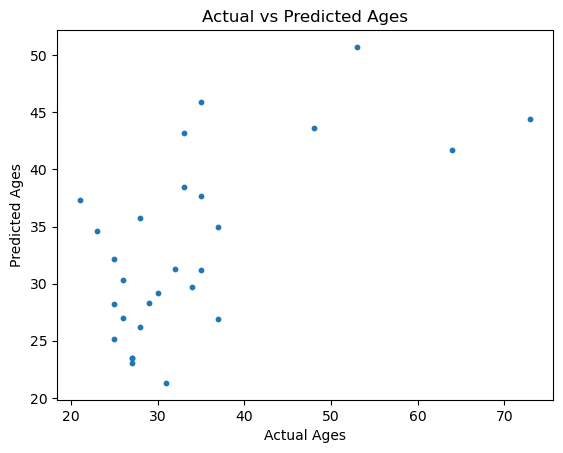

特徵重要程度:  [7.19330137e-06 6.01538741e-05 8.81559317e-05 1.26155303e-03
 2.23275492e-04 6.05125958e-03 2.53039416e-05 2.39391043e-03
 2.08075071e-04 6.42213708e-05 5.26904732e-05 0.00000000e+00
 1.55014517e-02 4.04198421e-04 0.00000000e+00 1.78088397e-02
 6.16354955e-05 0.00000000e+00 1.56353170e-03 0.00000000e+00
 2.82969885e-03 0.00000000e+00 0.00000000e+00 3.87438200e-02
 0.00000000e+00 2.70585227e-03 1.22593810e-05 2.46905768e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.72069800e-03 0.00000000e+00 0.00000000e+00
 2.25877557e-02 2.05163044e-04 7.99620408e-04 1.84753619e-03
 5.07884852e-06 1.58627430e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.85275220e-03
 0.00000000e+00 9.80038103e-03 0.00000000e+00 5.46188539e-06
 0.00000000e+00 5.08680881e-04 0.00000000e+00 0.00000000e+00
 2.19377780e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.10176930e-04

In [44]:
XGBR(df, age, test_size=0.3, n_estimators=65, max_depth=2, colsample_bytree = 1, gamma = 0.1, min_child_weight = 1, subsample = 0.8)

#  Without top genes(XGBR)

Cross-validation scores:  [-0.71214948 -0.27186873 -0.22819894 -0.36353448  0.64166697 -0.10558343
 -1.14979605  0.23006561  0.48188108 -0.09290319]
Mean Squared Error (MSE): 117.11104949531757
Mean Absolute Error (MAE): 8.997536891215557
Train Set score:  0.999926710871219
Test Set score:  0.0723541818024086
Pearson correlation: 0.5577741464307603


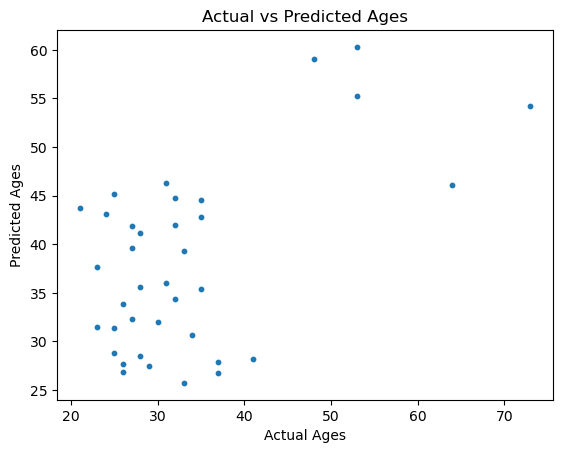

特徵重要程度:  [0.00156222 0.01904073 0.0119889  0.01753484 0.00463758 0.03008816
 0.01883711 0.06893415 0.00129948 0.02349046 0.02567688 0.02047758
 0.02321067 0.01686556 0.00432482 0.07527802 0.00502227 0.03678051
 0.00607328 0.02001172 0.03426424 0.09812617 0.         0.09194072
 0.         0.10198035 0.         0.13035621 0.         0.10760111
 0.         0.00459628 0.        ]


In [45]:
XGBR(df_without_topgene, age, test_size=0.4, n_estimators=60, max_depth=3, colsample_bytree = 1, gamma = 0.1, min_child_weight = 2, subsample = 0.9)

# RFR

In [23]:
def RandomForestRegression(X, y, test_size=0.3, n_estimators=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)#, random_state=0)
    # n_jobs=-1處理器全開
    RFR = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)# , random_state=0
    # 進行 k-fold cross-validation，例如 k=10
    scores = cross_val_score(RFR, X, y, cv=10)
    print('Cross-validation scores: ', scores)

    # train model
    RFR.fit(X_train, y_train)

    y_pred = RFR.predict(X_test)

    # 計算均方誤差（Mean Squared Error, MSE）
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    # 計算平均絕對誤差（Mean Absolute Error, MAE）
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    # 預測成功的比例
    print('Train Set score: ',RFR.score(X_train,y_train))
    print('Test Set score: ',RFR.score(X_test,y_test))

    # 計算皮爾森相關係數
    corr, _ = pearsonr(y_test, y_pred)
    print(f'Pearson correlation: {corr}')

    plt.scatter(y_test, y_pred, s=10, label='True')
    plt.xlabel('Actual Ages')
    plt.ylabel('Predicted Ages')
    plt.title('Actual vs Predicted Ages')
    plt.show()
    
    
    print('特徵重要程度: ',RFR.feature_importances_)
    #print('樹的深度: ',RFR.get_depth)

Cross-validation scores:  [-389.67956891 -322.83338776    0.          -61.44632653  -70.93533859
 -430.42556122 -124.24028061   -1.03450523  -10.52145442  -46.65776459]
Mean Squared Error (MSE): 83.14068513119534
Mean Absolute Error (MAE): 7.098979591836733
Train Set score:  0.8786838413824672
Test Set score:  -0.15334236575230276
Pearson correlation: 0.32723698955802805


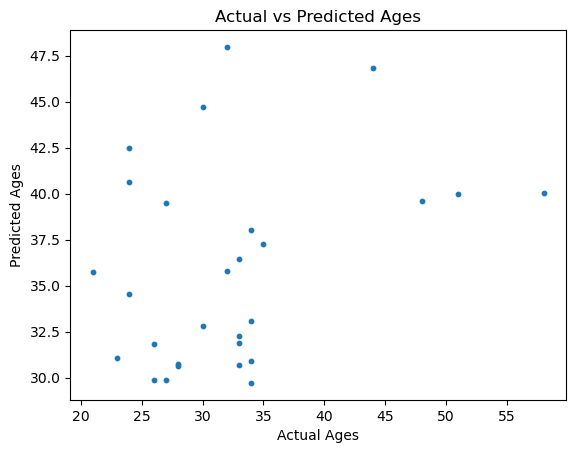

特徵重要程度:  [1.13202503e-04 6.10227605e-07 9.22540150e-05 9.44785522e-04
 2.20735137e-03 9.63473281e-05 4.87633906e-04 2.58338445e-04
 7.23649716e-05 8.97059614e-04 1.73793353e-03 3.16646016e-04
 1.18036288e-05 1.38924087e-04 1.34062390e-04 3.28994042e-03
 0.00000000e+00 1.63128038e-06 3.48994029e-04 3.49322504e-05
 1.46250736e-05 0.00000000e+00 5.61136452e-07 1.05963361e-02
 1.34885622e-03 1.06405481e-03 2.47074483e-05 0.00000000e+00
 2.31887711e-04 0.00000000e+00 4.93949495e-05 2.44367072e-02
 4.12063613e-06 1.23859173e-05 1.38399621e-03 3.01226661e-03
 7.93281217e-03 5.21110173e-07 1.47083710e-05 2.49953138e-05
 6.37720009e-04 0.00000000e+00 4.49853606e-04 2.08199676e-04
 1.08303952e-05 4.63552866e-07 1.69568465e-02 8.44601099e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.77470110e-05 2.52694040e-04 3.55116578e-04 3.07237003e-04
 8.97108476e-06 0.00000000e+00 6.00147702e-07 1.60534500e-03
 0.00000000e+00 1.86874370e-05 1.15617183e-04 2.67372828e-05
 7.16525280e-05

In [24]:
RandomForestRegression(df, age, test_size=0.3, n_estimators=70)

Cross-validation scores:  [-423.52499169 -254.72856805    0.          -65.57960552  -90.75013448
 -304.05846154 -155.23387574   -1.35220427  -13.04649783  -51.86766891]
Mean Squared Error (MSE): 213.56442096365177
Mean Absolute Error (MAE): 11.954395604395604
Train Set score:  0.8935469058271157
Test Set score:  0.07928147045122969
Pearson correlation: 0.38976117821916345


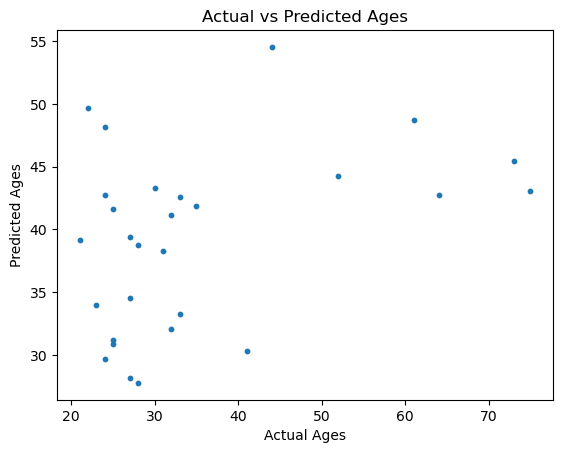

特徵重要程度:  [0.00000000e+00 1.68144473e-04 5.91264000e-07 2.10106744e-02
 1.11283723e-05 1.55110013e-04 4.43962927e-03 6.73722213e-05
 3.88265399e-03 1.07850475e-03 4.76016629e-04 3.70538310e-04
 1.94107930e-06 5.00738906e-04 0.00000000e+00 4.68856232e-06
 5.90173798e-04 8.34490930e-03 1.87892881e-03 6.46720188e-05
 1.12396917e-04 3.25658234e-05 3.09161733e-03 1.90769588e-04
 1.43928262e-04 9.87084700e-05 1.61753715e-05 3.91444062e-05
 2.17171686e-05 8.92660992e-05 1.50972834e-06 5.12879385e-03
 4.59643492e-04 1.08068981e-04 1.41059951e-04 0.00000000e+00
 4.32227434e-05 1.42534432e-04 2.15384967e-04 2.61748361e-05
 1.62070073e-05 1.67145569e-03 7.75325788e-05 8.93514899e-04
 3.53785727e-04 1.99400433e-05 4.61387874e-06 1.11397302e-05
 1.53107569e-06 4.08270551e-05 2.28899143e-06 4.12918916e-05
 7.81758448e-07 8.03037962e-06 9.85534764e-06 0.00000000e+00
 9.33317144e-05 0.00000000e+00 2.00839075e-05 0.00000000e+00
 8.22251111e-06 9.60417974e-07 3.99849798e-05 1.17408642e-04
 0.00000000e+00

In [25]:
RandomForestRegression(df, age, test_size=0.3, n_estimators=65)

# 沒有取交集的

In [51]:
# 將top200 的 gene 挑出來
def select_anndata(anndata, df, cell_type):
    # 先挑 cell type
    select_celltype = anndata[anndata.obs.cell_type == cell_type]
    # 在取交集
    negative = set(df.iloc[1]).intersection(set(anndata.var.gene_ids))
    negative_index = anndata.var.gene_ids.isin(negative)
    # 將挑好的cell type取出top 200 genes
    anndata_negative = select_celltype[:, negative_index]
    
    return anndata_negative


In [52]:
NK_negative = select_anndata(personal['HC-519'], negative_top200, "NK")

In [53]:
NK_negative

View of AnnData object with n_obs × n_vars = 131 × 200
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
N_mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_negative.X.T)):
        mean.append(float(np.mean(NK_negative.X.T[j])))
    N_mean_gene[i] = mean
N_mean_gene_df = pd.DataFrame(N_mean_gene)
N_mean_gene_df = N_mean_gene_df.T
N_mean_gene_df.columns = N_common_genes


P_mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_positive.X.T)):
        mean.append(float(np.mean(NK_positive.X.T[j])))
    P_mean_gene[i] = mean
P_mean_gene_df = pd.DataFrame(P_mean_gene)
P_mean_gene_df = P_mean_gene_df.T
P_mean_gene_df.columns = P_common_genes
mean

In [54]:
with open('mean_and_stdev_GSE174188.csv', 'r') as file:
    mean_and_std = pd.read_csv(file, index_col = 0)
#mean_and_std["N_NK"] = mean
mean_and_std

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,std_Monocyte,std_DC
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,0.637790,0.118725
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,0.588125,0.341599
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,0.680489,0.182131
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,0.672437,0.190104
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,0.713794,0.174472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,0.852107,0.109943
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,0.625976,0.123043
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,0.790643,0.326397
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,0.604755,0.164673


In [57]:
mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_negative.X.T)):
        mean.append(float(np.mean(NK_negative.X.T[j])))
    mean_gene[i] = mean

In [955]:
age

HC-519               21
HC-520               22
IGTB1974_IGTB1974    23
IGTB1916_IGTB1916    23
IGTB1987_IGTB1987    23
                     ..
HC-540               68
HC-536               71
HC-524               73
HC-022               74
IGTB1731_IGTB1731    75
Name: age, Length: 92, dtype: int32